In [20]:
!pip install fastai --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 866.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 11.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 2.2 MB/s eta 0:00:0000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 315.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 3.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.2/793.2 kB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 947.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [99]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [204]:
%pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 1.2 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


## UNSW-NB15 data set analysis attacks

### Desciption

    dur: Duration of the flow.
    proto: Protocol used (e.g., tcp, udp).
    service: Network service used (e.g., http, ftp).
    state: Status of the connection (e.g., CON, FIN).
    spkts: Source to destination packet count.
    dpkts: Destination to source packet count.
    sbytes: Source to destination transaction bytes.
    dbytes: Destination to source transaction bytes.
    rate: Flow data rate.
    sttl: Source to destination time to live value.
    dttl: Destination to source time to live value.
    sload: Source bits per second.
    dload: Destination bits per second.
    sloss: Source packets retransmitted or dropped.
    dloss: Destination packets retransmitted or dropped.
    sinpkt: Source inter-packet arrival time.
    dinpkt: Destination inter-packet arrival time.
    sjit: Source jitter (time between two packets).
    djit: Destination jitter.
    swin: Source window size.
    stcpb: Source TCP base sequence number.
    dtcpb: Destination TCP base sequence number.
    dwin: Destination window size.
    tcprtt: The sum of TCP connection setup round-trip time.
    synack: The time between the SYN and the SYN_ACK packets.
    ackdat: The time between the SYN_ACK and the ACK packets.
    smean: Mean of the packet size transmitted by the src.
    dmean: Mean of the packet size transmitted by the dst.
    trans_depth: Represents the depth into the connection of http request/response transaction.
    response_body_len: Actual uncompressed content size of the data transferred from the server's http service.
    ct_srv_src: No. of connections that have the same service and source address.
    ct_state_ttl: No. of connections that have the same state and time to live.
    ct_dst_ltm: No. of connections that have the same destination address.
    ct_src_dport_ltm: No. of connections that have the same source address and the destination port.
    ct_dst_sport_ltm: No. of connections that have the same destination address and the source port.
    ct_dst_src_ltm: No. of connections that have the same source and the destination address.
    is_ftp_login: 1 if the login is a successful FTP login; 0 otherwise.
    ct_ftp_cmd: No. of flows that have a command in FTP service.
    ct_flw_http_mthd: No. of flows that have methods such as GET and POST in HTTP service.
    ct_src_ltm: No. of connections that have the same source address.
    ct_srv_dst: No. of connections that have the same service and destination address.
    is_sm_ips_ports: 1 if the source and destination IP addresses and port numbers are equal; 0 otherwise.
    attack_cat: Type of attack category if any (e.g., Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance, Analysis, Backdoor, Shellcode, Worms).
    label: Indicates if the record is normal or an attack (0 for normal, 1 for attack).

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

### 1. Data cleaning

In [2]:
import numpy as np
import pandas as pd

In [5]:
to_clean = 'data/UNSW_NB15_training-set.csv'

In [42]:
df = pd.read_csv(to_clean, skipinitialspace=True, low_memory=False, encoding='utf-8')
df.drop(columns=['id'], inplace=True)

In [60]:
df_ = pd.read_csv('data/UNSW_NB15_testing-set.csv', skipinitialspace=True, low_memory=False, encoding='utf-8')
df_.drop(columns=['id'], inplace=True)

In [43]:
from fastai.tabular.all import df_shrink

df = df_shrink(df, skip=[], obj2cat=True, int2uint=False)
df.isna().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [44]:
df.dtypes

dur                   float32
proto                category
service              category
state                category
spkts                   int16
dpkts                   int16
sbytes                  int32
dbytes                  int32
rate                  float32
sttl                    int16
dttl                    int16
sload                 float32
dload                 float32
sloss                   int16
dloss                   int16
sinpkt                float32
dinpkt                float32
sjit                  float32
djit                  float32
swin                    int16
stcpb                   int64
dtcpb                   int64
dwin                    int16
tcprtt                float32
synack                float32
ackdat                float32
smean                   int16
dmean                   int16
trans_depth             int16
response_body_len       int32
ct_srv_src               int8
ct_state_ttl             int8
ct_dst_ltm               int8
ct_src_dpo

In [45]:
df_train = df.drop(['attack_cat'], axis=1)

In [61]:
df_test = df_.drop(['attack_cat'], axis=1)

### 2. Data analysis and preparation

In [28]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score

def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=5)
    return accuracies.mean()

def fit_and_evaluate(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    
    model_pred = model.predict(x_test)
    model_cross = cross_val(x_train, y_train, model)
    
    return model_cross

def run_experiment(model, x_train , x_test , y_train , y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    report=classification_report(y_test,y_pred)
    print(report)

#### 2.1 Encoding 

In [54]:
le = LabelEncoder()
def encoding(df):
    df['proto']=le.fit_transform(df['proto'])
    df['service']=le.fit_transform(df['service'])
    df['state']=le.fit_transform(df['state'])

In [65]:
encoding(df_train)
encoding(df_test)

#### 2.2 Analysis

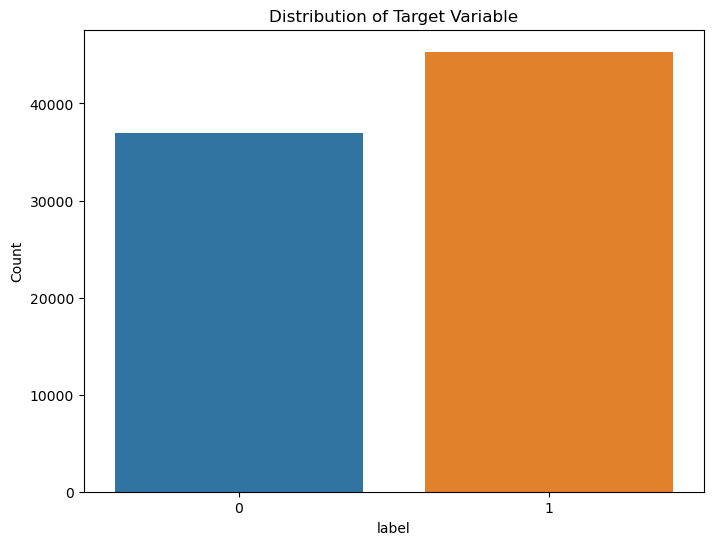

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_count(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Target Variable')
    plt.xlabel('label')
    plt.ylabel('Count')
    plt.show()
    
plot_count(df_train)

#### 2.2 Scaling features

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

MinMaxScaler doesn’t reduce the effect of outliers, but it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

x = df_train.drop(['label'], axis=1).values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = df_train['label'].values

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.2 , random_state=42)

ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [66]:
xl_test = df_test.drop(['label'], axis=1).values
yl_test = df_test['label'].values

#### 2.3 Logistic regression

In [63]:
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_train , x_test , y_train , y_test)

print('Logistic Regression Performance on the Validation set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the Validation set: Cross Validation Score = 0.8630


In [67]:
y_pred = logr.predict(xl_test)
print("Accuracy on test dataset: ", accuracy_score(yl_test, y_pred))

Accuracy on test dataset:  0.7420797189476506


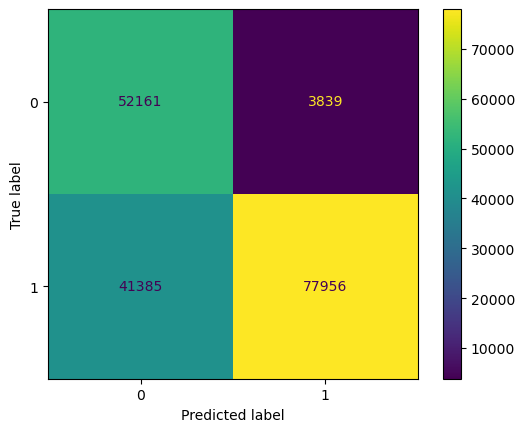

In [68]:
cm = confusion_matrix(yl_test, y_pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.show()

### 3. Outliers check

#### 3.1 Outliers

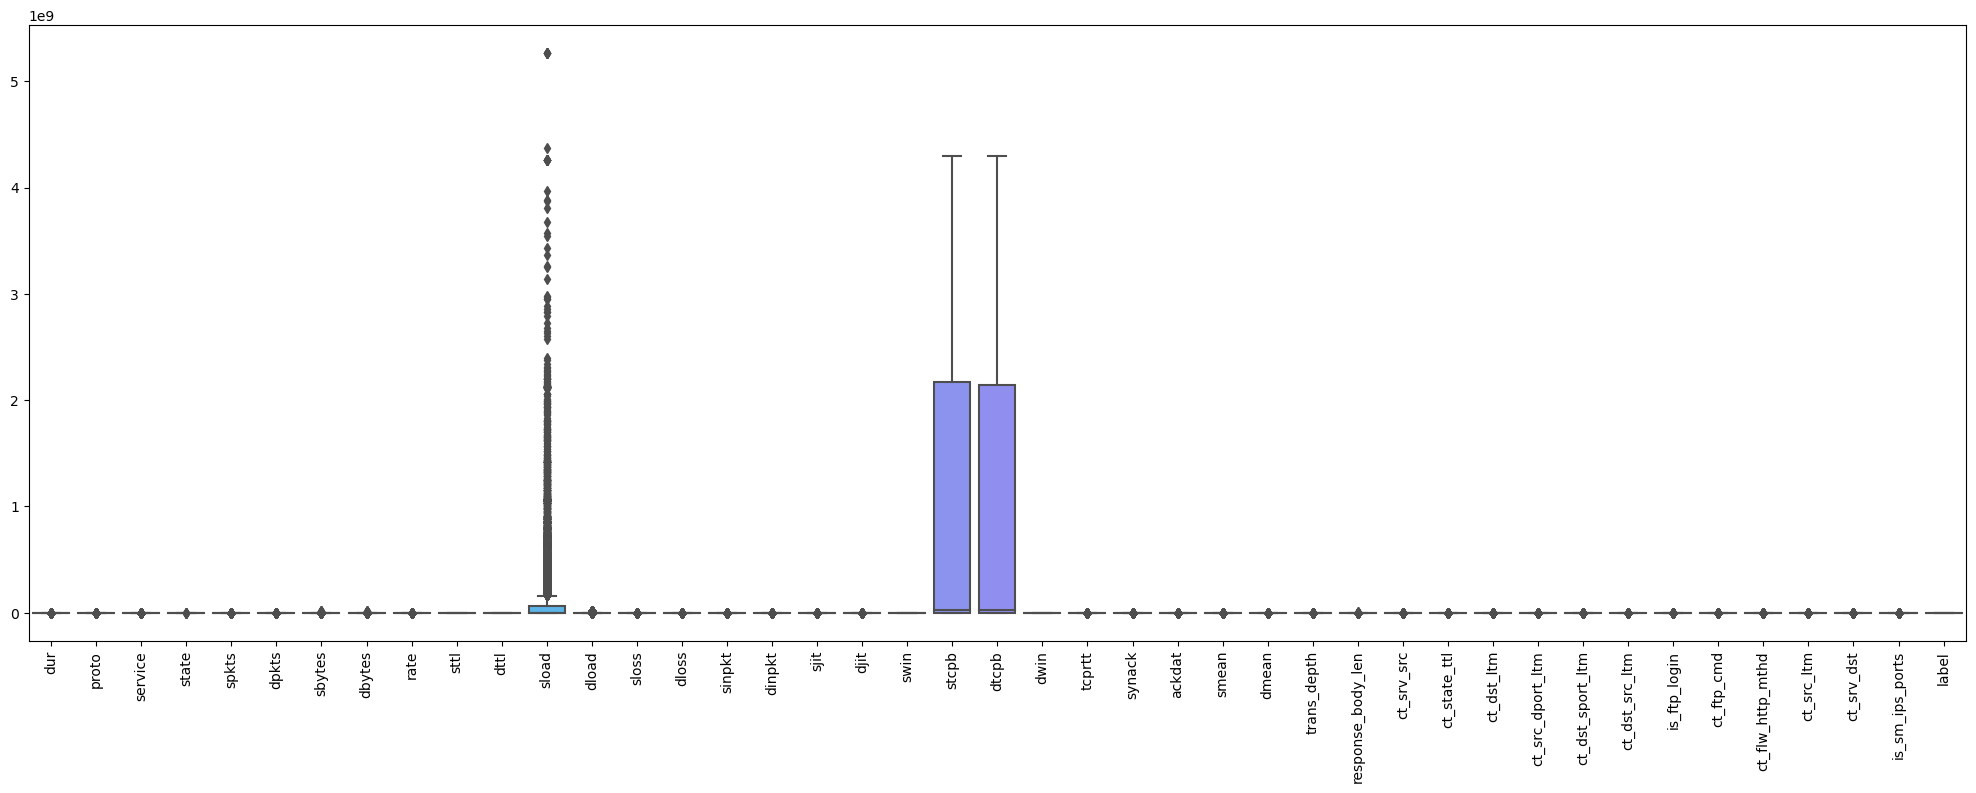

In [69]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=df_train)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

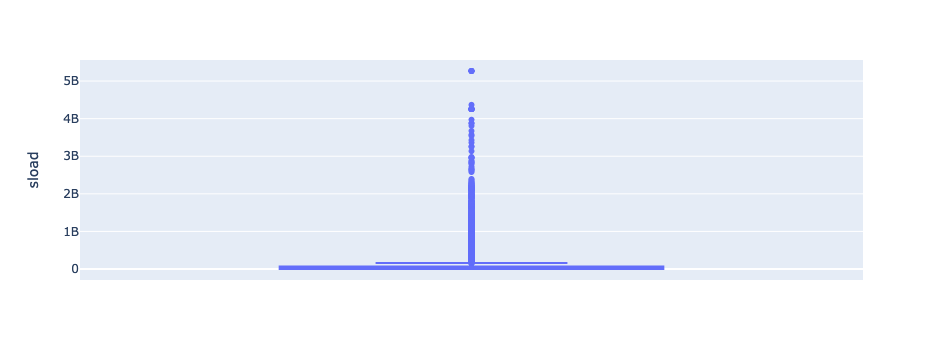

In [71]:
fig = px.box(df_train, y='sload')
fig.show()

#### 3.2 Clean 

In [74]:
df_train_outlier_free = df_train.drop(df_train[df_train['sload']>162400000].index)
df_train_outlier_free.shape

(75617, 43)

In [81]:
df_test_outlier_free = df_test.drop(df_test[df_test['sload']>222000000].index)
df_test_outlier_free.shape

(161823, 43)

#### 3.3 Logistic regression

In [85]:
xx = df_train_outlier_free.drop(['label'], axis=1)
yy = df_train_outlier_free['label']

ro_scaler = RobustScaler()
scaler = MinMaxScaler()

xx = scaler.fit_transform(xx)
xx = ro_scaler.fit_transform(xx)

XX_train , XX_test , yy_train , yy_test = train_test_split(xx, yy, test_size= 0.2 , random_state=42)

In [86]:
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, XX_train , XX_test , yy_train , yy_test)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.8700


In [93]:
xxl_test = df_test_outlier_free.drop(['label'], axis=1)
yyl_test = df_test_outlier_free['label']

xxl_test = scaler.transform(xxl_test)
xxl_test = ro_scaler.transform(xxl_test)

In [94]:
y_pred = logr.predict(xxl_test)
print("Accuracy on test dataset: ", accuracy_score(yyl_test, y_pred))

Accuracy on test dataset:  0.8418580795066214


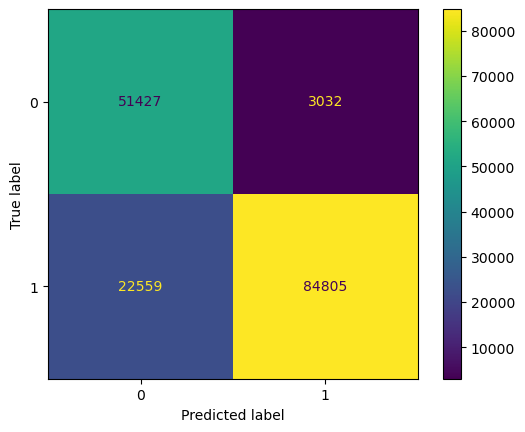

In [95]:
cm = confusion_matrix(yyl_test, y_pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.show()

#### 3.4 Result

As a result we can confirm that we have improved accuraccy only with cleaning data from outliers.

### 4. XGBoost

In [137]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score)

def create_model(regressor, param_grid):
    pipeline = Pipeline(steps=[
        ('scaler', 'passthrough'),
        ('classifier', regressor)
    ])

    param_grid['scaler'] = [MinMaxScaler(), RobustScaler()]

    grid_search = GridSearchCV(pipeline,
                               param_grid, 
                               cv=5, 
                               scoring=accuracy_scorer, 
                               return_train_score=True,
                               n_jobs=4)

    return grid_search

#### 4.1 Model training

In [143]:
X = df_train.drop(['label'], axis=1)
y = df_train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 'classifier__max_depth': [3, 5, 7], 'classifier__n_estimators': [5, 10, 50]
model = create_model(xgb.XGBClassifier(), {})
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11147
           1       0.99      0.97      0.98     13553

    accuracy                           0.98     24700
   macro avg       0.98      0.98      0.98     24700
weighted avg       0.98      0.98      0.98     24700



In [144]:
X_test = df_test.drop(['label'], axis=1)
y_test = df_test['label']
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     56000
           1       0.97      0.90      0.93    119341

    accuracy                           0.91    175341
   macro avg       0.89      0.92      0.90    175341
weighted avg       0.92      0.91      0.91    175341



#### 4.2 Logistic regression comparison

In [133]:
X_test = df_test_outlier_free.drop(['label'], axis=1)
y_test = df_test_outlier_free['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = create_model(LogisticRegression(), {})
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

/Users/aleksandr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksandr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11147
           1       0.89      0.91      0.90     13553

    accuracy                           0.89     24700
   macro avg       0.89      0.89      0.89     24700
weighted avg       0.89      0.89      0.89     24700



### 5. Futher analysis

Check https://arxiv.org/pdf/2307.11544.pdf for feature selection

### 6. cicids dataset attacks

Dataset could be downloaded like
`aws s3 cp s3://cse-cic-ids2018/Processed\ Traffic\ Data\ for\ ML\ Algorithms/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv ./ --no-sign-request`

In [222]:
import pandas as pd

ids2018_df = pd.read_csv('data/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')

In [223]:
ids2018_df

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0              0         0  01/03/2018 08:17:11      115307855             5   
1              0         0  01/03/2018 08:20:07       60997457             2   
2             67        17  01/03/2018 08:17:18       61149019             5   
3              0         0  01/03/2018 08:22:09       60997555             2   
4              0         0  01/03/2018 08:24:11       61997503             3   
...          ...       ...                  ...            ...           ...   
331120  Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts   
331121  Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts   
331122  Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts   
331123  Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts   
331124  Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts   

        Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0             1500                0              300   
3                  0                0                0                0   
4                  0                0                0                0   
...              ...              ...              ...              ...   
331120  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max   
331121  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max   
331122  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max   
331123  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max   
331124  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max   

        Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                     0  ...                 0      1812348           0   
1                     0  ...                 0            0           0   
2                   300  ...                 8      3530939           0   
3                     0  ...                 0            0           0   
4                     0  ...                 0       999909           0   
...                 ...  ...               ...          ...         ...   
331120  Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std   
331121  Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std   
331122  Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std   
331123  Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std   
331124  Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std   

        Active Max  Active Min  Idle Mean     Idle Std  Idle Max  Idle Min  \
0          1812348     1812348   56700000  6010057.622  61000000  52500000   
1                0           0   61000000            0  61000000  61000000   
2          3530939     3530939   19200000     12500000  32600000   7999725   
3                0           0   61000000            0  61000000  61000000   
4           999909      999909   61000000            0  61000000  61000000   
...            ...         ...        ...          ...       ...       ...   
331120  Active Max  Active Min  Idle Mean     Idle Std  Idle Max  Idle Min   
331121  Active Max  Active Min  Idle Mean     Idle Std  Idle Max  Idle Min   
331122  Active Max  Active Min  Idle Mean     Idle Std  Idle Max  Idle Min   
331123  Active Max  Active Min  Idle Mean     Idle Std  Idle Max  Idle Min   
331124  Active Max  Active Min  Idle Mean     Idle Std  Idle Max  Idle Min   

         Label  
0       Benign  
1       Benign  
2       Benign  
3       Benign  
4       Benign  
...        ...  
331120   Label  
331121   Label  
331122   Label  
331123   Label  
331124   Label  

[331125 rows x 80 columns]

In [224]:
ids2018_df['TotLen Fwd Pkts'] = pd.to_numeric(ids2018_df['TotLen Fwd Pkts'], errors='coerce')
ids2018_df['TotLen Bwd Pkts'] = pd.to_numeric(ids2018_df['TotLen Bwd Pkts'], errors='coerce')
ids2018_df['Flow Duration'] = pd.to_numeric(ids2018_df['Flow Duration'], errors='coerce')

ids2018_df['sload'] = (ids2018_df['TotLen Fwd Pkts'] * 8) / ids2018_df['Flow Duration']
ids2018_df['dload'] = (ids2018_df['TotLen Bwd Pkts'] * 8) / ids2018_df['Flow Duration']
ids2018_df['Label'] = ids2018_df['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

ids2018_df.rename(columns={
    'Protocol': 'proto',
    'Flow Duration': 'dur',
    'Tot Fwd Pkts': 'spkts',
    'Tot Bwd Pkts': 'dpkts',
    'TotLen Fwd Pkts': 'sbytes',
    'TotLen Bwd Pkts': 'dbytes',
    'Fwd Pkt Len Mean': 'smean',
    'Bwd Pkt Len Mean': 'dmean',
    'Fwd IAT Std': 'sinpkt',  
    'Bwd IAT Std': 'dinpkt',  
    'Init Fwd Win Byts': 'swin',
    'Init Bwd Win Byts': 'dwin',
    'Label': 'label'
}, inplace=True)
ids2018_df = ids2018_df.dropna()

In [226]:
common_fields = ['proto', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 
                               'smean', 'dmean', 'sinpkt', 'dinpkt','swin', 
                               'dwin', 'sload', 'dload', 'label']

In [227]:
df_ids2018_common = ids2018_df[common_fields]
df_ids2018_common.to_csv('data/Thursday_cleaned.csv')

In [228]:
df_ids2018_common

proto          dur spkts dpkts  sbytes  dbytes  smean        dmean  \
0          0  115307855.0     5     0     0.0     0.0      0            0   
1          0   60997457.0     2     0     0.0     0.0      0            0   
2         17   61149019.0     5     0  1500.0     0.0    300            0   
3          0   60997555.0     2     0     0.0     0.0      0            0   
4          0   61997503.0     3     0     0.0     0.0      0            0   
...      ...          ...   ...   ...     ...     ...    ...          ...   
331107     0  118494070.0    31     0     0.0     0.0      0            0   
331108     6     114340.0     2     1     0.0     0.0      0            0   
331109     6    1404866.0     8     7  1132.0  1581.0  141.5  225.8571429   
331110     6    3966663.0    14     7  1386.0   392.0     99           56   
331111     6   86637706.0     2     0     0.0     0.0      0            0   

             sinpkt       dinpkt   swin   dwin     sload     dload  label  
0          32400000            0     -1     -1  0.000000  0.000000      0  
1                 0            0     -1     -1  0.000000  0.000000      0  
2          12800000            0     -1     -1  0.000196  0.000000      0  
3                 0            0     -1     -1  0.000000  0.000000      0  
4          42400000            0     -1     -1  0.000000  0.000000      0  
...             ...          ...    ...    ...       ...       ...    ...  
331107  165377.1609            0     -1     -1  0.000000  0.000000      0  
331108            0            0   1024      0  0.000000  0.000000      0  
331109   384889.782  365410.7707   8192  62868  0.006446  0.009003      0  
331110  339201.1571  374800.8171   8192  62652  0.002795  0.000791      0  
331111            0            0  62608     -1  0.000000  0.000000      0  

[328186 rows x 15 columns]

In [217]:
# Prepare source dataframe

df_train_common_fields = df_train[common_fields]
df_train_common_fields

proto       dur  spkts  dpkts  sbytes  dbytes  smean  dmean  \
0        117  0.000011      2      0     496       0    248      0   
1        117  0.000008      2      0    1762       0    881      0   
2        117  0.000005      2      0    1068       0    534      0   
3        117  0.000006      2      0     900       0    450      0   
4        117  0.000010      2      0    2126       0   1063      0   
...      ...       ...    ...    ...     ...     ...    ...    ...   
82327    117  0.000005      2      0     104       0     52      0   
82328    111  1.106101     20      8   18062     354    903     44   
82329      6  0.000000      1      0      46       0     46      0   
82330      6  0.000000      1      0      46       0     46      0   
82331    117  0.000009      2      0     104       0     52      0   

             sinpkt      dinpkt  swin  dwin         sload        dload  label  
0          0.011000    0.000000     0     0  1.803636e+08     0.000000      0  
1          0.008000    0.000000     0     0  8.810000e+08     0.000000      0  
2          0.005000    0.000000     0     0  8.544000e+08     0.000000      0  
3          0.006000    0.000000     0     0  6.000000e+08     0.000000      0  
4          0.010000    0.000000     0     0  8.504000e+08     0.000000      0  
...             ...         ...   ...   ...           ...          ...    ...  
82327      0.005000    0.000000     0     0  8.320000e+07     0.000000      0  
82328     55.880051  143.699997   255   255  1.241044e+05  2242.109863      0  
82329  60000.718750    0.000000     0     0  0.000000e+00     0.000000      0  
82330  60000.730469    0.000000     0     0  0.000000e+00     0.000000      0  
82331      0.009000    0.000000     0     0  4.622222e+07     0.000000      0  

[82332 rows x 15 columns]

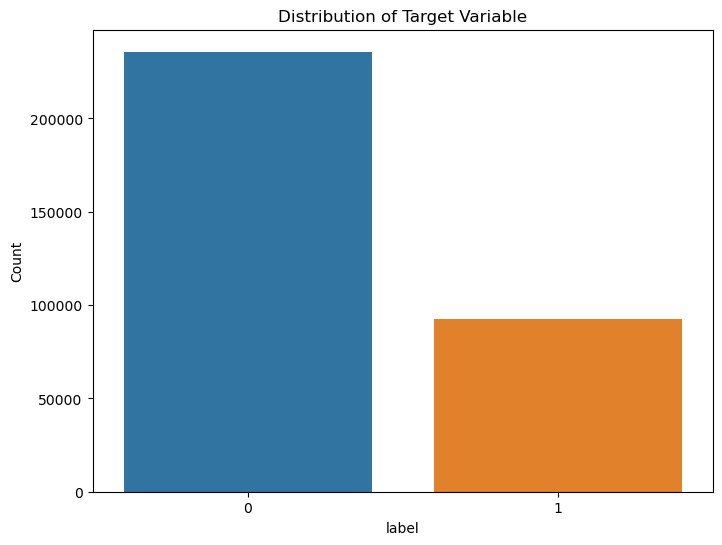

In [229]:
plot_count(df_ids2018_common)

In [230]:
X = df_train_common_fields.drop(['label'], axis=1)
y = df_train_common_fields['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = create_model(xgb.XGBClassifier(), {'classifier__max_depth': [3, 5, 7], 'classifier__n_estimators': [5, 10, 50]})
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11147
           1       0.96      0.92      0.94     13553

    accuracy                           0.94     24700
   macro avg       0.94      0.94      0.94     24700
weighted avg       0.94      0.94      0.94     24700



In [231]:
X_test = df_ids2018_common.drop(['label'], axis=1)
y_test = df_ids2018_common['label']
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

ValueError: Input X contains infinity or a value too large for dtype('float64').